In [91]:
import keras
print(keras.__version__)

2.10.0


In [92]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [93]:
train_data.shape

(25000,)

In [94]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [95]:
train_labels[0] # 있다 없다 판단

1

In [96]:
word_index = imdb.get_word_index()
word_index.items()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())

In [97]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # i-3 : 0,1,2는 특수문자로 이루어져서 음의 변수로 만들어버려 dict 내 index의 key가 존재하지 않는것이 되어 ?로 변환 (불러온 자료의 특성이 0,1,2에 우리가 쓸 데이터가 없으니 제외한다.)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [98]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [99]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000): # demension을 안주면 자동으로 10000값 입력됨
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences): # i는 enumerate에서 파생된 index번호, sequence는 sequences에 있는 value 중 key 값을 1로 변환
        results[i,sequence] = 1
    return results

# Data의 Encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [100]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [101]:
# float type으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [106]:
# 신경망의 구축
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [111]:
# optimizers의 제약조건
from tensorflow.keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy']) # metrics  = 지표??

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [104]:
# 좋은 결과를 얻기 위해 x_val, x_train, x_test 3번의 검증을 걸치는 것이 좋다.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [112]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 516, validation_data = (x_val,y_val)) # val_accuracy를 봐야함

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5020 - accuracy: 0.7952 - val_loss: 0.3745 - val_accuracy: 0.8721
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3003 - accuracy: 0.9021 - val_loss: 0.3005 - val_accuracy: 0.8884
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2183 - accuracy: 0.9271 - val_loss: 0.2829 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1724 - accuracy: 0.9437 - val_loss: 0.2817 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1382 - accuracy: 0.9570 - val_loss: 0.3084 - val_accuracy: 0.8776
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1115 - accuracy: 0.9663 - val_loss: 0.2966 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0931 - accuracy: 0.9721 - val_loss: 0.3260 - val_accuracy: 0.8778
Epoch 8/20
30

In [113]:
# 실험 결과 데이터를 가져온다. 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1 )

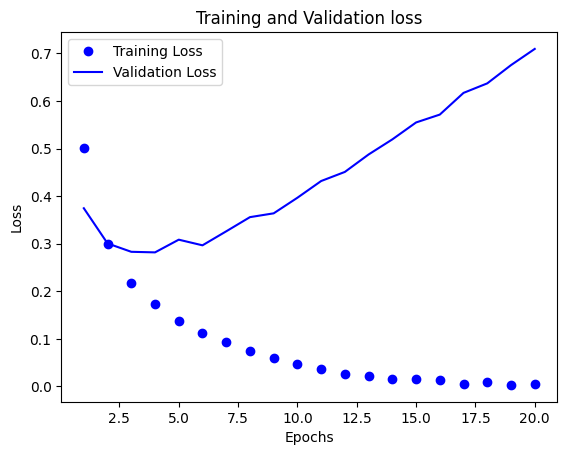

In [114]:
# 실험 결과를 시각화 한다,
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

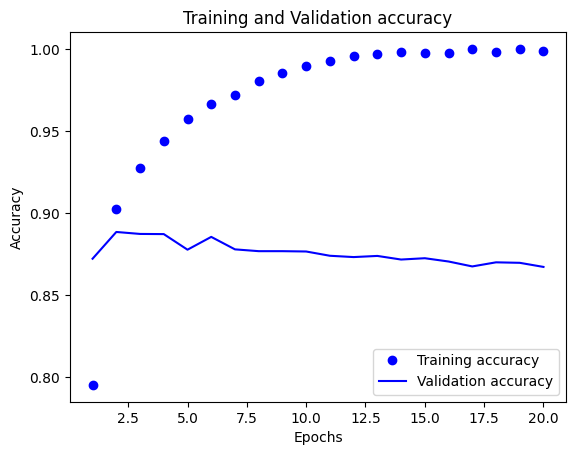

In [115]:
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b-', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [105]:
history = model.fit(partial_x_train, partial_y_train, epochs = 3, batch_size = 256, validation_data = (x_val,y_val)) # val_accuracy를 봐야함

Epoch 1/3
59/59 [==============================] - 2s 21ms/step - loss: 0.4468 - accuracy: 0.8233 - val_loss: 0.3336 - val_accuracy: 0.8699
Epoch 2/3
59/59 [==============================] - 1s 13ms/step - loss: 0.2431 - accuracy: 0.9161 - val_loss: 0.2746 - val_accuracy: 0.8904
Epoch 3/3
59/59 [==============================] - 1s 13ms/step - loss: 0.1770 - accuracy: 0.9389 - val_loss: 0.2770 - val_accuracy: 0.8898
